 # [Module 2.3] CatBoost 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 훈련, 검증 데이터 로딩
- Category 인덱스 추출
- CatBoost 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 생성

In [157]:
import pandas as pd

In [158]:
%store -r pre_train_file
%store -r pre_val_file
%store -r pre_test_file

## 훈련, 검증 데이터 세트 로딩

In [159]:
train_df = pd.read_csv(pre_train_file, header=None, skiprows=1)
val_df = pd.read_csv(pre_val_file, header=None, skiprows=1)
print("train_df: ", train_df.shape)
print("val_df: ", val_df.shape)

train_df:  (53740, 19)
val_df:  (13436, 19)


In [160]:
from IPython.display import display
display(train_df.head())
display(val_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,2649,26,29.99,10.96,9000.0,2640.0,32,177,256,21,2,4,10,303,18945,1440,5.074929,49.146671
1,2,764,13,23.90,26.82,1500.0,14625.0,40,345,51,21,2,4,10,145,5195,40907,4.074929,9.894500
2,4,295,11,249.90,17.59,610.0,4928.0,60,555,333,15,2,4,10,119,1961,21580,30.244957,29.405597
3,4,2410,19,89.90,17.51,1850.0,10764.0,21,770,429,21,2,4,10,222,16907,16659,6.074929,35.405597
4,2,2174,19,93.90,17.61,1200.0,12500.0,40,1493,257,14,2,4,10,217,15103,13779,4.074929,11.815563


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,1372,23,105.00,23.89,1000.0,7632.0,66,379,291,14,2,19,1,204,3146,12017,260.375634,10.894500
1,0,784,25,99.97,15.80,650.0,9600.0,48,553,44,7,2,19,1,222,1865,13207,7.728837,23.244957
2,3,2660,18,76.99,23.34,1850.0,3000.0,11,394,342,18,2,19,1,169,6637,4275,7.728837,19.556197
3,2,2174,18,64.90,15.55,200.0,4752.0,20,763,342,18,2,19,1,169,5150,3275,7.728837,62.013337
4,4,2820,7,75.00,27.51,2550.0,31500.0,38,539,342,18,2,19,1,55,7003,4720,28.361672,65.968300


In [161]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
X_val, y_val = val_df.iloc[:,1:], val_df.iloc[:,0]

## 레이블 인코딩된 category 인덱스 추출
- CatBoost 알고리즘에 category 인덱스를 알려 주기 위해서 임

In [162]:
cat_features_index = (X_train.dtypes == 'int64').index.tolist()
cat_features_index = [num -1 for num in cat_features_index]
cat_features_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

## CatBoost 훈련


In [163]:
%%time 

import catboost as cb
# cat_features_index = [] # customer_state, product_category_name_english, seller_state
# cat_features_index = [0,7,8,9] # customer_state, product_category_name_english, seller_state

clf = cb.CatBoostClassifier(eval_metric="Accuracy",max_depth=5,
                           iterations = 500)
clf.fit(X_train, y_train, verbose=False)


CPU times: user 3min 1s, sys: 3.05 s, total: 3min 4s
Wall time: 5.55 s


In [164]:
clf.score(X_val, y_val)

0.35114617445668356

## Train 과 Val를 합쳐서 훈련 (Train_Val)

In [165]:
# def concatenate_train_val(X_train, y_train, X_val, y_val):
#     X_train_val = pd.concat([X_train, X_val], axis=0)
#     print("X_train_val: ", X_train_val.shape)
#     y_train_val = pd.concat([y_train, y_val], axis=0)    
#     print("y_train_val: ", y_train_val.shape)    
    
#     return X_train_val, y_train_val

# X_train_val, y_train_val = concatenate_train_val(X_train, y_train, X_val, y_val)
# clf = cb.CatBoostClassifier(eval_metric="Accuracy",max_depth=5,
#                            iterations = 500)
# clf.fit(X_train_val, y_train_val, verbose=False)



## Test 데이터로 평가

In [166]:
test_df = pd.read_csv(pre_test_file, header=None,skiprows=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,1372,23,105.00,23.89,1000.0,7632.0,66,379,291,14,2,19,1,204,3146,12017,260.375634,10.894500
1,0,784,25,99.97,15.80,650.0,9600.0,48,553,44,7,2,19,1,222,1865,13207,7.728837,23.244957
2,3,2660,18,76.99,23.34,1850.0,3000.0,11,394,342,18,2,19,1,169,6637,4275,7.728837,19.556197
3,2,2174,18,64.90,15.55,200.0,4752.0,20,763,342,18,2,19,1,169,5150,3275,7.728837,62.013337
4,4,2820,7,75.00,27.51,2550.0,31500.0,38,539,342,18,2,19,1,55,7003,4720,28.361672,65.968300


In [167]:
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [168]:
prediction = clf.predict(X_test)

## 모델 평가

In [169]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.35%
f1_score: 0.30%


[[ 296  496  761  115   37]
 [ 185  928 1729 1094  226]
 [ 146  387 2295 1276  431]
 [  58  171  685 1061  193]
 [  15   64  347  302  138]]


<Figure size 432x288 with 0 Axes>

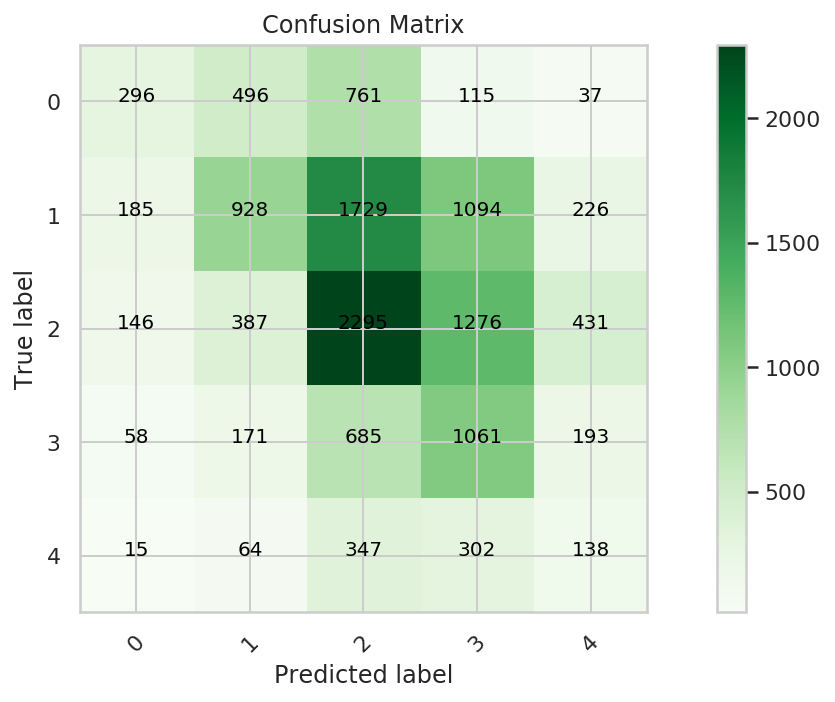

In [170]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

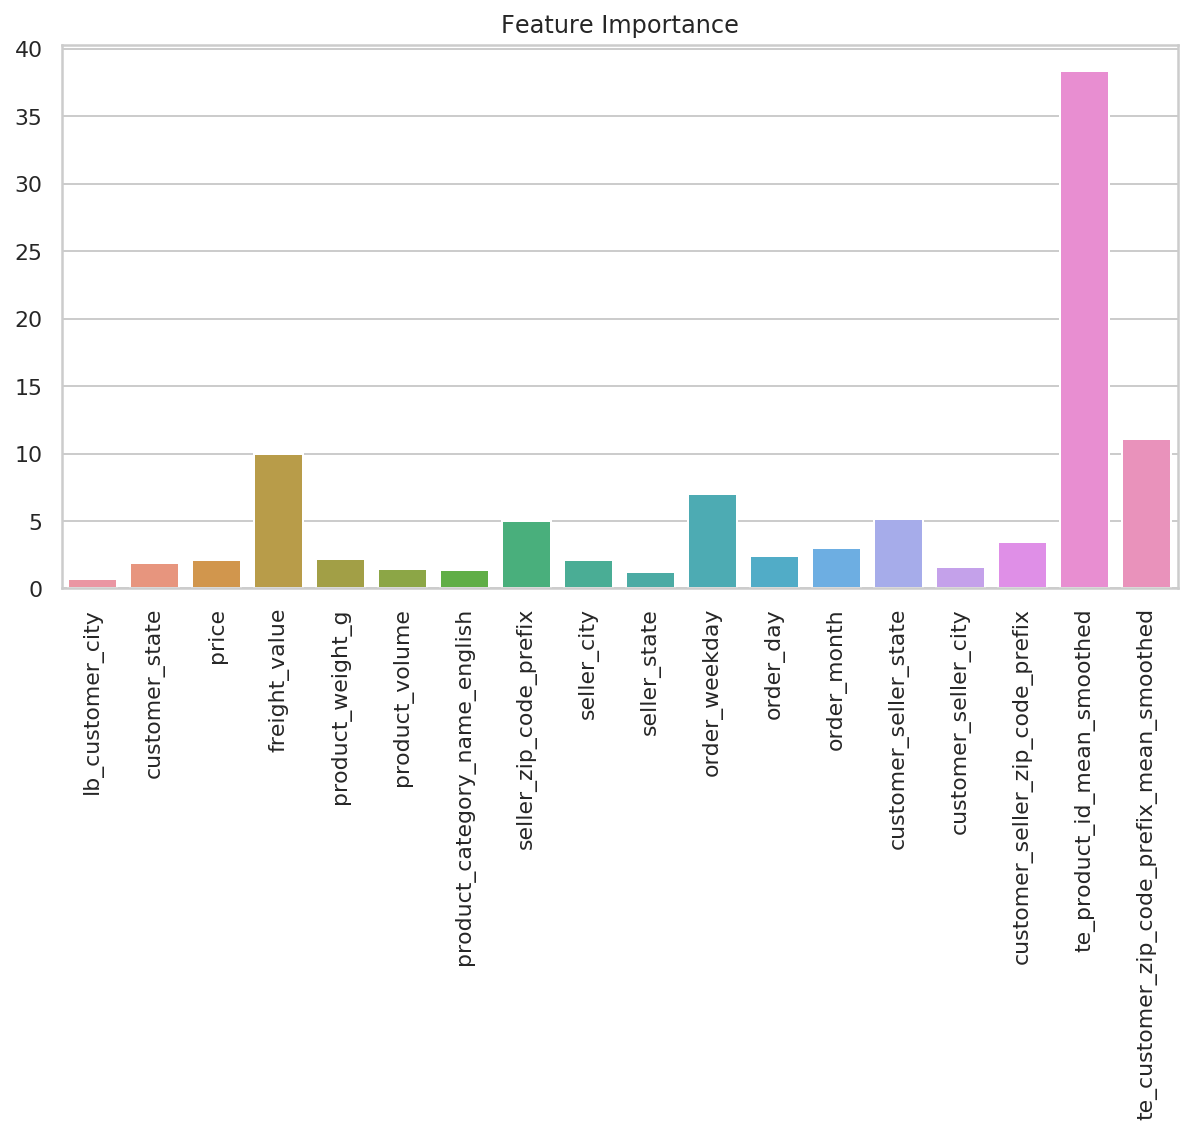

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


test_col_df = pd.read_csv(pre_test_file)
features = test_col_df.columns[1:]
fea_importance = clf.feature_importances_

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()